In [1]:
from recovar import (
    RepresentationLearningSingleAutoencoder,
    RepresentationLearningMultipleAutoencoder,
    ClassifierAutocovariance,
    ClassifierAugmentedAutoencoder,
    ClassifierMultipleAutoencoder
)
from direct_tester import DirectTester
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np

2025-07-06 16:52:05.698743: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-06 16:52:05.717291: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-07-06 16:52:05.717308: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-07-06 16:52:05.717320: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-07-06 16:52:05.720831: I tensorflow/core/platform/cpu_feature_g

In [2]:
tester = DirectTester()

model_class = RepresentationLearningMultipleAutoencoder

In [3]:
TEST_DATA_PATH="/home/ege/recovar/reproducibility/preprocessed_data/new_instance/FULL_INSTANCE_100_test.hdf5"
MODEL_PATH="/home/ege/recovar/reproducibility/checkpoints/FULL_INSTANCE_SUBSAMPLED_100_train_epoch_05.h5"

In [4]:
results = tester.test(
    representation_model_class=model_class,
    classifier_wrapper_class=ClassifierMultipleAutoencoder,
    test_dataset_path=TEST_DATA_PATH,
    model_weights_path=MODEL_PATH,
    batch_size=256,
    use_hdf5_generator=True,
    apply_crop_offset_filter=True 
)

2025-07-06 16:52:10.121299: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-07-06 16:52:10.136362: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-07-06 16:52:10.136440: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

Loading model: representation_learning_autoencoder_ensemble


2025-07-06 16:52:11.226014: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8700


Loaded weights from: /home/ege/recovar/reproducibility/checkpoints/FULL_INSTANCE_SUBSAMPLED_100_train_epoch_05.h5
Loading metadata for crop offset filtering...
Crop offset filter: 171496/258308 samples passed

Testing on: /home/ege/recovar/reproducibility/preprocessed_data/new_instance/FULL_INSTANCE_100_test.hdf5
Number of batches: 1010
Using HDF5Generator
Processed 10/1010 batches...
Processed 20/1010 batches...
Processed 30/1010 batches...
Processed 40/1010 batches...
Processed 50/1010 batches...
Processed 60/1010 batches...
Processed 70/1010 batches...
Processed 80/1010 batches...
Processed 90/1010 batches...
Processed 100/1010 batches...
Processed 110/1010 batches...
Processed 120/1010 batches...
Processed 130/1010 batches...
Processed 140/1010 batches...
Processed 150/1010 batches...
Processed 160/1010 batches...
Processed 170/1010 batches...
Processed 180/1010 batches...
Processed 190/1010 batches...
Processed 200/1010 batches...
Processed 210/1010 batches...
Processed 220/1010 b

In [5]:
scores, labels = results
print(f"Got {len(scores)} predictions after filtering")

Got 171496 predictions after filtering


In [6]:
results

(array([6.9959641e-01, 1.6680956e-03, 9.8603964e-01, ..., 4.9889088e-04,
        2.6869774e-04, 6.6262484e-04], dtype=float32),
 array([1, 1, 1, ..., 0, 0, 0], dtype=int32))

In [7]:
def plot_roc_curve(scores, labels, title="ROC Curve"):
    """
    Plot ROC curve and calculate AUC
    
    Args:
        scores: Predicted probabilities/scores
        labels: True binary labels (0/1)
        title: Plot title
    """

    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(labels, scores)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, 
             label=f'ROC curve (AUC = {roc_auc:.3f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', 
             label='Random classifier')
    
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print(f"AUC Score: {roc_auc:.4f}")
    return roc_auc

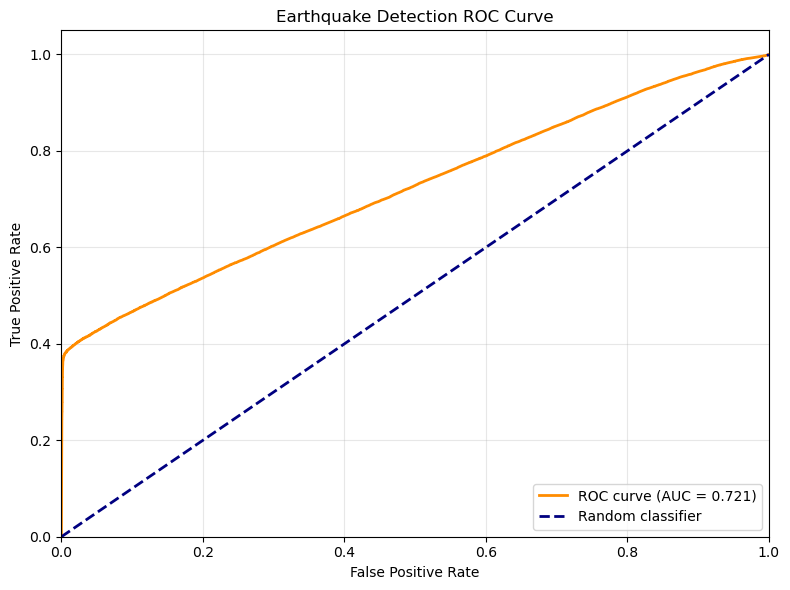

AUC Score: 0.7213


0.721306055299531

In [8]:
scores, labels = results 
plot_roc_curve(scores, labels, "Earthquake Detection ROC Curve")

# Compare with unfiltered results 


--- Running without filter for comparison ---
Loading model: representation_learning_autoencoder_ensemble
Loaded weights from: /home/ege/recovar/reproducibility/checkpoints/FULL_INSTANCE_SUBSAMPLED_100_train_epoch_05.h5

Testing on: /home/ege/recovar/reproducibility/preprocessed_data/new_instance/FULL_INSTANCE_100_test.hdf5
Number of batches: 1010
Using HDF5Generator
Processed 10/1010 batches...
Processed 20/1010 batches...
Processed 30/1010 batches...
Processed 40/1010 batches...
Processed 50/1010 batches...
Processed 60/1010 batches...
Processed 70/1010 batches...
Processed 80/1010 batches...
Processed 90/1010 batches...
Processed 100/1010 batches...
Processed 110/1010 batches...
Processed 120/1010 batches...
Processed 130/1010 batches...
Processed 140/1010 batches...
Processed 150/1010 batches...
Processed 160/1010 batches...
Processed 170/1010 batches...
Processed 180/1010 batches...
Processed 190/1010 batches...
Processed 200/1010 batches...
Processed 210/1010 batches...
Processe

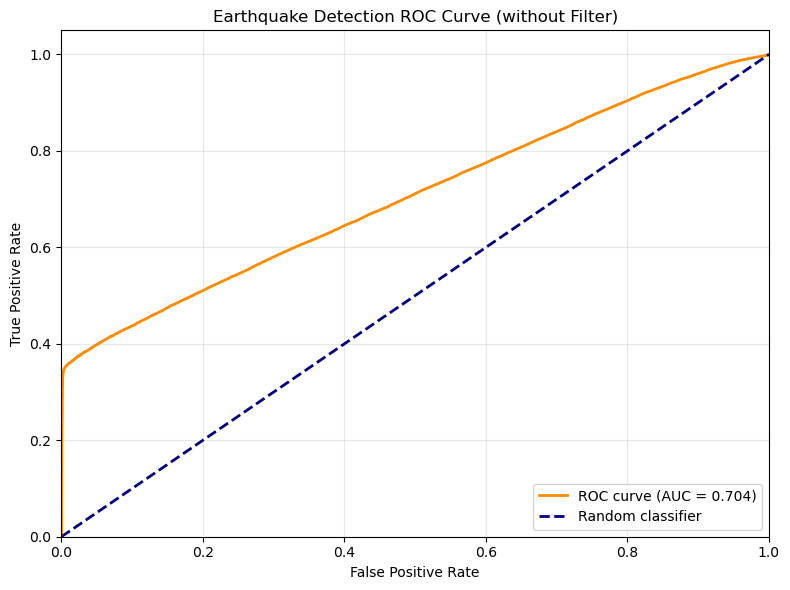

AUC Score: 0.7045

Comparison:


NameError: name 'roc_auc' is not defined

In [9]:
print("\n--- Running without filter for comparison ---")
results_unfiltered = tester.test(
    representation_model_class=model_class,
    classifier_wrapper_class=ClassifierMultipleAutoencoder,
    test_dataset_path=TEST_DATA_PATH,
    model_weights_path=MODEL_PATH,
    batch_size=256,
    use_hdf5_generator=True,
    apply_crop_offset_filter=False
)

scores_unfiltered, labels_unfiltered = results_unfiltered
print(f"Got {len(scores_unfiltered)} predictions without filtering")

auc_score_unfiltered = plot_roc_curve(scores_unfiltered, labels_unfiltered, 
                                      "Earthquake Detection ROC Curve (without Filter)")

print(f"\nComparison:")
print(f"With crop offset filter: AUC = {roc_auc:.4f}, n_samples = {len(scores)}")
print(f"Without filter: AUC = {auc_score_unfiltered:.4f}, n_samples = {len(scores_unfiltered)}")